Import libraries that used in the code

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

The data is available from 22 Jan, 2020. Data is in “data.csv”.
The dataset contains 14 major variables that will be having an impact on whether someone has 
recovered or not, the description of each variable are as follows,
1. Country: where the person resides
2. Location: which part in the Country
3. Age: Classification of the age group for each person, based on WHO Age Group Standard
4. Gender: Male or Female 
5. Visited_Wuhan: whether the person has visited Wuhan, China or not
6. From_Wuhan: whether the person is from Wuhan, China or not
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear: 
14. Result: death (1) or recovered (0)

In [2]:
#readin the data
df = pd.read_csv('../input/covid19-deaths-data/data.csv',index_col=0)
print(type(df))
df.head(5)

<class 'pandas.core.frame.DataFrame'>


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [3]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [4]:
df.dtypes

location          int64
country           int64
gender            int64
age             float64
vis_wuhan         int64
from_wuhan        int64
symptom1          int64
symptom2          int64
symptom3          int64
symptom4          int64
symptom5          int64
symptom6          int64
diff_sym_hos      int64
result            int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


Splitting the features and target

In [6]:
x = df.iloc[:,1:-1] # features columns
y = df['result'] # Target column
print(x.shape)
print(y.shape)

(863, 12)
(863,)


In [7]:
# from collections import Counter
# print(Counter(y).keys())
# Counter(y).values()
y.value_counts()

0    755
1    108
Name: result, dtype: int64

<AxesSubplot:ylabel='Frequency'>

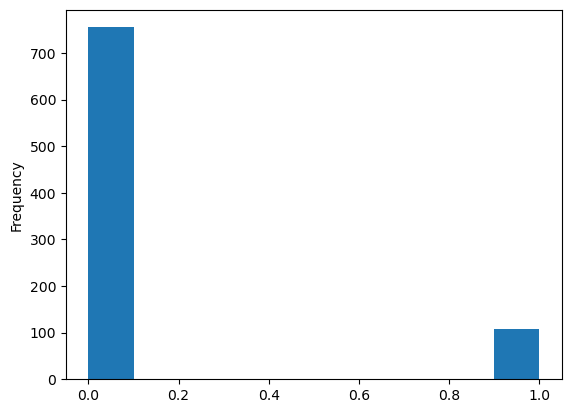

In [8]:
y.plot(kind="hist")

In [9]:
df.corr()['result']

location        0.046240
country        -0.094443
gender         -0.061441
age             0.515127
vis_wuhan      -0.151122
from_wuhan      0.128314
symptom1       -0.163039
symptom2       -0.103270
symptom3       -0.074982
symptom4       -0.108723
symptom5        0.020676
symptom6        0.012882
diff_sym_hos    0.219116
result          1.000000
Name: result, dtype: float64

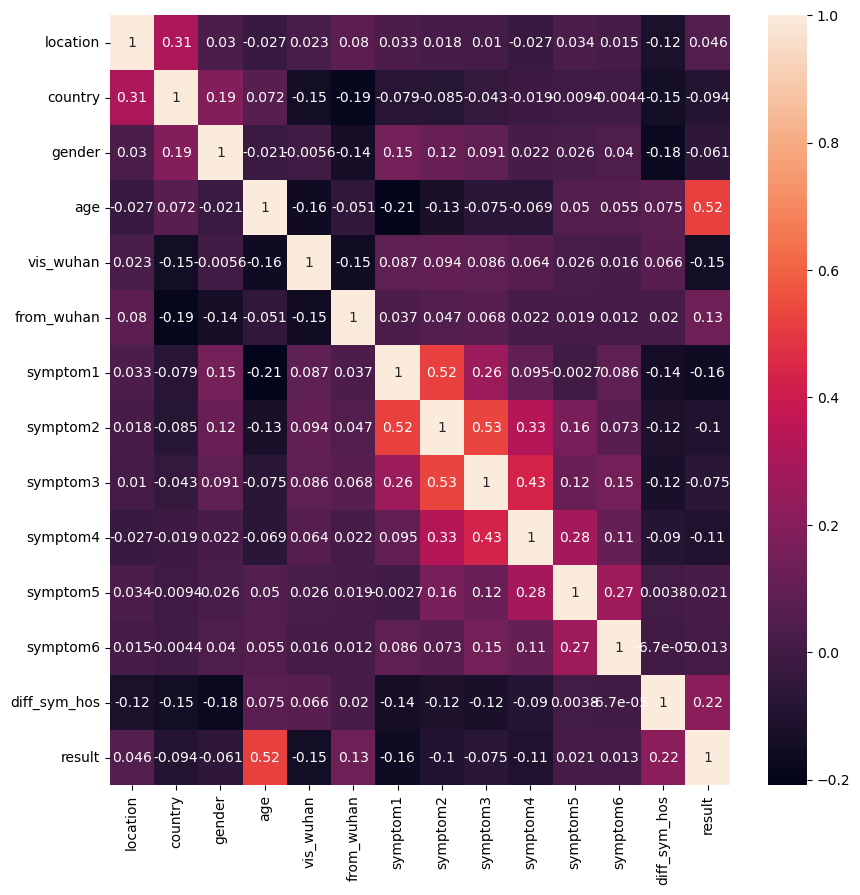

In [10]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True)

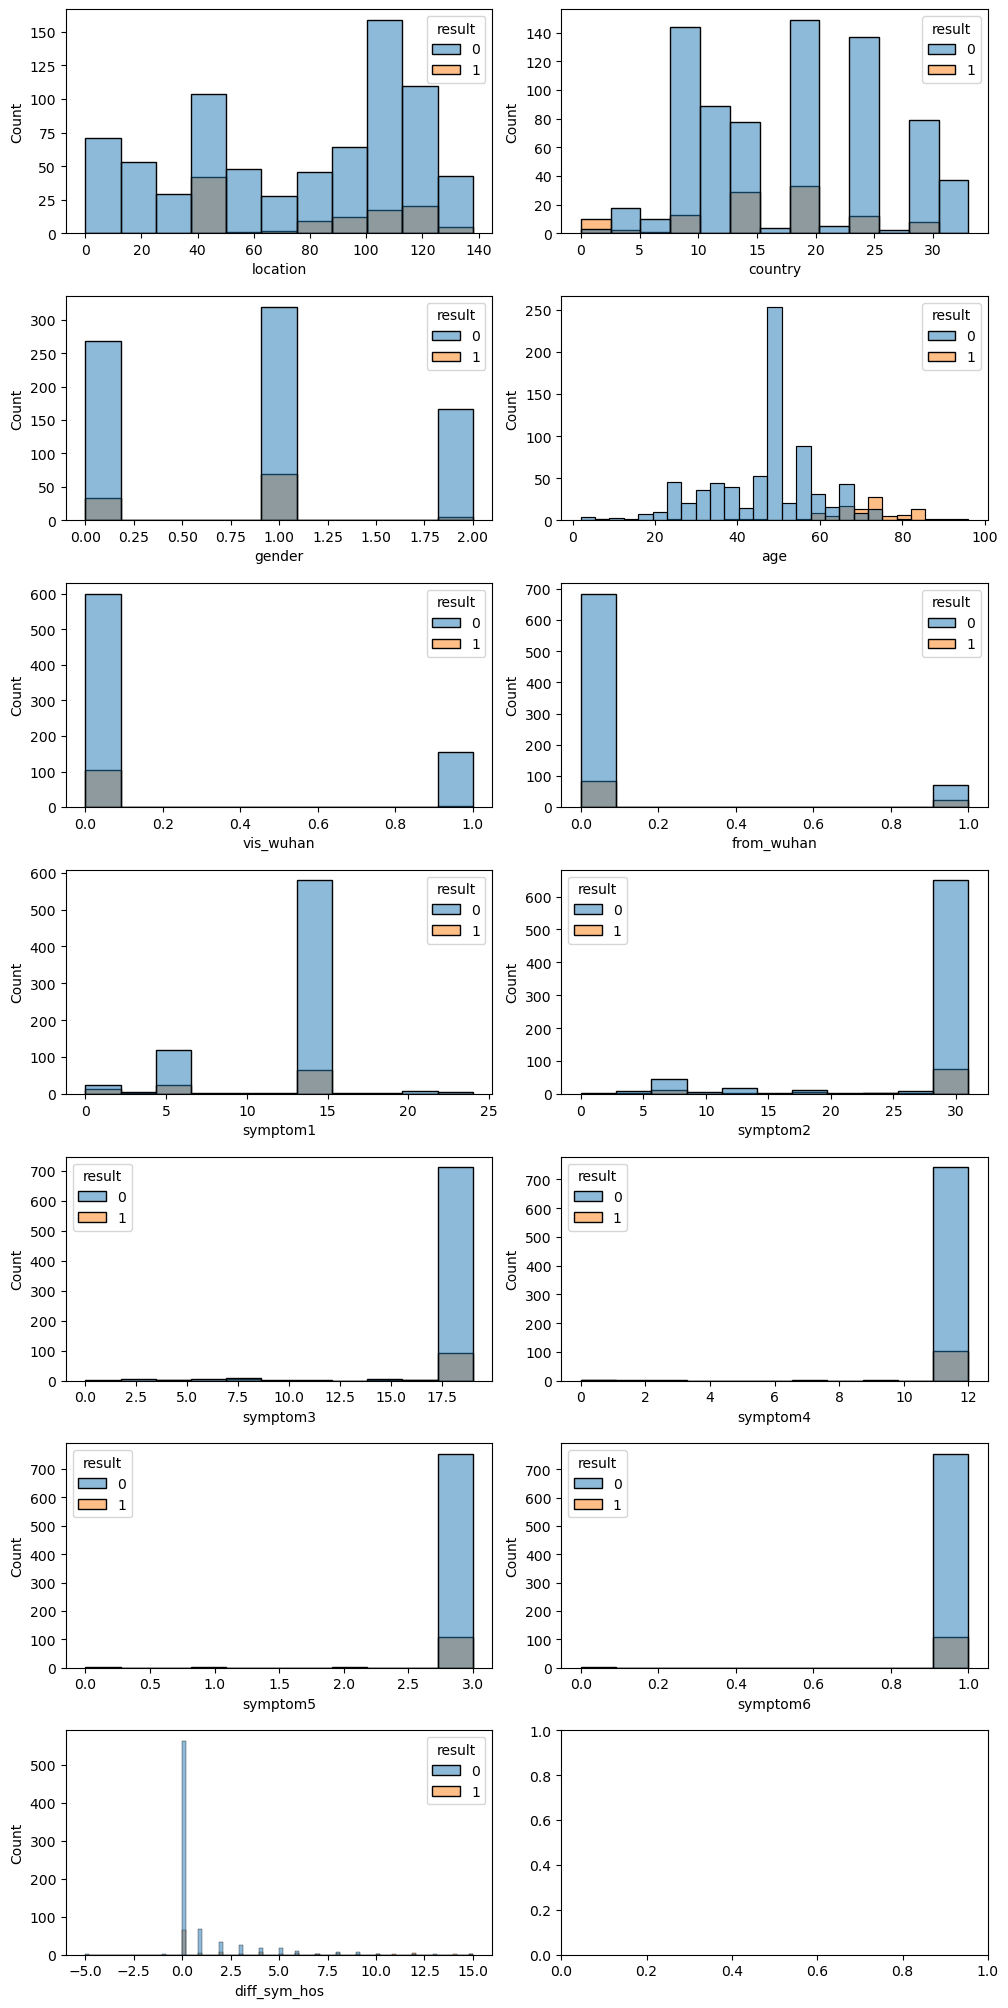

In [11]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
for i in range(13):
    sns.histplot(x=df.columns[i],hue='result',data=df, ax=ax[i//2][i%2])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)
xvalidate, xtest, yvalidate, ytest = train_test_split(xtest, ytest, test_size=0.1)
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xvalidate = scaler.transform(xvalidate)
xtest = scaler.transform(xtest)

****K-Nearest Neighbors****

In [13]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
yhat=knn.predict(xtest)
confusion_matrix(ytest, yhat)
print(classification_report(ytest, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(ytest, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         1

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

1.0


In [14]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(xtrain, ytrain)

yhat=grid.predict(xvalidate)
confusion_matrix(yvalidate, yhat)
print(classification_report(yvalidate, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(yvalidate, yhat))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       205
           1       0.93      0.46      0.62        28

    accuracy                           0.93       233
   macro avg       0.93      0.73      0.79       233
weighted avg       0.93      0.93      0.92       233

0.7297038327526133


In [15]:
yhat=grid.predict(xtest)
confusion_matrix(ytest, yhat)
print(classification_report(ytest, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(ytest, yhat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.00      0.00      0.00         1

    accuracy                           0.96        26
   macro avg       0.48      0.50      0.49        26
weighted avg       0.92      0.96      0.94        26

0.5


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression**

In [16]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)
confusion_matrix(ytest, yhat)
print(classification_report(ytest, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(ytest, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         1

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

1.0


In [17]:
lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xtrain, ytrain)

yhat=grid_result.predict(xvalidate)
confusion_matrix(yvalidate, yhat)
print(classification_report(yvalidate, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(yvalidate, yhat))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       205
           1       0.92      0.82      0.87        28

    accuracy                           0.97       233
   macro avg       0.95      0.91      0.93       233
weighted avg       0.97      0.97      0.97       233

0.9058362369337979


In [18]:
yhat=grid_result.predict(xtest)
confusion_matrix(ytest, yhat)
print(classification_report(ytest, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(ytest, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         1

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

1.0


**Naïve Bayes**

In [19]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)
yhat=nb.predict(xtest)
confusion_matrix(ytest, yhat)
print(classification_report(ytest, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(ytest, yhat))

              precision    recall  f1-score   support

           0       1.00      0.16      0.28        25
           1       0.05      1.00      0.09         1

    accuracy                           0.19        26
   macro avg       0.52      0.58      0.18        26
weighted avg       0.96      0.19      0.27        26

0.5800000000000001


In [20]:
nb = GaussianNB()
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nbModel_grid = GridSearchCV(estimator=nb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
grid_result = grid_search.fit(xtrain, ytrain)

yhat=grid_result.predict(xvalidate)
confusion_matrix(yvalidate, yhat)
print(classification_report(yvalidate, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(yvalidate, yhat))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       205
           1       0.92      0.82      0.87        28

    accuracy                           0.97       233
   macro avg       0.95      0.91      0.93       233
weighted avg       0.97      0.97      0.97       233

0.9058362369337979


In [21]:
yhat=grid_result.predict(xtest)
confusion_matrix(ytest, yhat)
print(classification_report(ytest, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(ytest, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         1

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

1.0


**Decision Trees**

In [22]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain,ytrain)
yhat=dt.predict(xtest)
confusion_matrix(ytest, yhat)
print(classification_report(ytest, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(ytest, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         1

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

1.0


In [23]:
dt = DecisionTreeClassifier(random_state=42)
params = {'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]}
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_result = grid_search.fit(xtrain, ytrain)

yhat=grid_result.predict(xvalidate)
confusion_matrix(yvalidate, yhat)
print(classification_report(yvalidate, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(yvalidate, yhat))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       205
           1       0.79      0.82      0.81        28

    accuracy                           0.95       233
   macro avg       0.88      0.90      0.89       233
weighted avg       0.95      0.95      0.95       233

0.8960801393728223


In [24]:
yhat=grid_result.predict(xtest)
confusion_matrix(ytest, yhat)
print(classification_report(ytest, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(ytest, yhat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.50      1.00      0.67         1

    accuracy                           0.96        26
   macro avg       0.75      0.98      0.82        26
weighted avg       0.98      0.96      0.97        26

0.98


**Support Vector Machines**

In [25]:
svm = SVC()
svm.fit(xtrain,ytrain)
yhat=svm.predict(xtest)
confusion_matrix(ytest, yhat)
print(classification_report(ytest, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(ytest, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         1

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

1.0


In [26]:
svm = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
grid_result = grid_search.fit(xtrain, ytrain)

yhat=grid_result.predict(xvalidate)
confusion_matrix(yvalidate, yhat)
print(classification_report(yvalidate, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(yvalidate, yhat))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       205
           1       0.79      0.82      0.81        28

    accuracy                           0.95       233
   macro avg       0.88      0.90      0.89       233
weighted avg       0.95      0.95      0.95       233

0.8960801393728223


In [27]:
yhat=grid_result.predict(xtest)
confusion_matrix(ytest, yhat)
print(classification_report(ytest, yhat, target_names=['0','1']))
print(metrics.roc_auc_score(ytest, yhat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.50      1.00      0.67         1

    accuracy                           0.96        26
   macro avg       0.75      0.98      0.82        26
weighted avg       0.98      0.96      0.97        26

0.98
